# Week3 Multiple Linear Regression
## 背景描述  
汽车发动机在测功机上产生的**制动马力**被认为是**发动机转速**(每分钟转数，rpm)、**燃料的道路辛烷值**和**发动机压缩值**的函数，我们在实验室里进行实验，研究它们的函数关系。


## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）rpm | 发动机转速 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Road_Octane_Number | 道路辛烷值 | continuous variable | $\mathbb{R}^+$ |
| （自变量）Compression | 压缩值 | continuous variable | $\mathbb{R}^+$ |
| （因变量）Brake_Horsepower | 制动马力 | continuous variable | $\mathbb{R}^+$ |

## 问题 
注：这里使用 $\alpha=0.05$ 的显著性水平

1. 请用两种方式建立多元线性回归模型，描述制动马力和上述 3 个自变量之间的函数关系.
2. 将数据中心化之后，求经验回归方程，跟原模型进行比较
3. 请问Q1中所建立的模型是否合理.
4. 当发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，估计制动马力值的合理区间范围.


## 解决方案



In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Import additional packages
from statsmodels.formula.api import ols#进行多元线性回归所需要的库
from scipy.stats import f
from scipy.stats import t
import warnings
warnings.filterwarnings("ignore")

#已知量
alpha = 0.05
p = 3
n = 12

df = pd.read_csv('D:\\mycode\\Untitled Folder\\可视化code\\统计学习方法\\第3次实验 Multiple Linear Regression\\HW3\\Project3.csv')
#修改列名
df.rename(columns={'rpm':'P1','Road Octane Number':'P2','Compression':'P3','Brake Horsepower':'F'},inplace=True)
#添加截距项
df['intercept'] = 1 
df = df[['intercept', 'P1', 'P2', 'P3','F']]
print(df)

data = df.values
#X矩阵
X = data[:, 0 : p + 1]
#y
y = data[:, -1]

    intercept    P1  P2   P3    F
0           1  2000  90  100  225
1           1  1800  94   95  212
2           1  2400  88  110  229
3           1  1900  91   96  222
4           1  1600  86  100  219
5           1  2500  96  110  278
6           1  3000  94   98  246
7           1  3200  90  100  237
8           1  2800  88  105  233
9           1  3400  86   97  224
10          1  1800  90  100  223
11          1  2500  89  104  230


### Q1: 请用两种方式建立多元线性回归模型，描述制动马力和上述 3 个自变量之间的函数关系.


建立多元线性回归模型：

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + + \beta_3x_3 + \varepsilon$$

$\varepsilon$ 为随机误差，假定 $E(\varepsilon) = 0, \text{Var} (\varepsilon) = \sigma ^2$



#### 【法1】：使用 <a href = "https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html">statsmodels.formula.api.ols</a> 进行多元线性回归。


In [2]:
#建立模型
model = ols('F ~ P1 + P2 + P3', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
X = data[:, 0 : p + 1]
Y = data[:, -1]
Y_hat = model.fittedvalues
model.summary()

参数估计值: 
 Intercept   -266.0312
P1             0.0107
P2             3.1348
P3             1.8674
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      F   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 09 Oct 2021   Prob (F-statistic):            0.00317
Time:                        22:45:11   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -266.0312     92.674     -2.871      0.021    -479.737     -52.325
P1             0.0107      0.004      2.390      0.044       0.000       0.021
P2             3.1348      0.844      3.712      0.006       1.188       5.082
P3             1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                     9.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
beta_hat_1 = model.params
print('回归系数的估计值:')
print(beta_hat_1)
print('\n线性回归方程:')
print('y_hat = %.2f + %.2f * x1 + %.2f * x2 + %.2f * x3' % (beta_hat_1[0], beta_hat_1[1], beta_hat_1[2], beta_hat_1[3]))

y_hat_1 = model.fittedvalues

回归系数的估计值:
Intercept   -266.031212
P1             0.010713
P2             3.134806
P3             1.867409
dtype: float64

线性回归方程:
y_hat = -266.03 + 0.01 * x1 + 3.13 * x2 + 1.87 * x3


#### 【法2】：使用公式

$$\hat{\beta} = (X'X)^{-1}X'y$$

$$\hat{y} = X(X'X)^{-1}X'y$$

In [4]:
beta_hat_2 = (np.linalg.inv(X.T @ X) @ X.T) @ y

print('回归系数的估计值:')
print(beta_hat_2)
print('\n线性回归方程:')
print('y_hat = %.2f + %.2f * x1 + %.2f * x2 + %.2f * x3' % (beta_hat_1[0], beta_hat_1[1], beta_hat_1[2], beta_hat_1[3]))

y_hat_2 = np.dot(X, beta_hat_2)
beta_hat = beta_hat_1
y_hat = y_hat_1

回归系数的估计值:
[-2.66031212e+02  1.07132079e-02  3.13480626e+00  1.86740943e+00]

线性回归方程:
y_hat = -266.03 + 0.01 * x1 + 3.13 * x2 + 1.87 * x3


### Q2: 将数据中心化之后，求经验回归方程，跟原模型进行比较

In [5]:
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 数据中心化
X_cent = X - X_mean
y_cent = y - y_mean

In [6]:
# Do the multiple linear regression
df_cent = pd.DataFrame(X_cent, columns = ['intercept_cent', 'P1_cent', 'P2_cent','P3_cent'])
df_cent['F_cent'] = y_cent

model_cent = ols('F_cent ~ P1_cent + P2_cent + P3_cent', df_cent).fit()
model_cent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 F_cent   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Sat, 09 Oct 2021   Prob (F-statistic):            0.00317
Time:                        22:45:14   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.22e-16      2.544  -8.73e-17      1.000      -5.866       5.866
P1_cent        0.0107      0.004      2.390      0.044       0.000       0.021
P2_cent        3.1348      0.844      3.712      0.006       1.188       5.082
P3_cent        1.8674      0.535      3.494      0.008       0.635       3.100
==============================================================================
Omnibus:                        0.392   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.230
Skew:                          -0.282   Prob(JB):                        0.891
Kurtosis:                       2.625   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
beta_cent_hat = model_cent.params
print('回归系数的估计值:')
print(beta_cent_hat)
print('\n线性回归方程:')
print('y_hat_center = %.2f + %.2f * x1_center + %.2f * x2_center + %.2f * x3_center' % (beta_cent_hat[0], beta_cent_hat[1], beta_cent_hat[2], beta_cent_hat[3]))

y_hat_cent = model_cent.fittedvalues

回归系数的估计值:
Intercept   -2.220446e-16
P1_cent      1.071321e-02
P2_cent      3.134806e+00
P3_cent      1.867409e+00
dtype: float64

线性回归方程:
y_hat_center = -0.00 + 0.01 * x1_center + 3.13 * x2_center + 1.87 * x3_center


通过比较可以看出，去中心化后的线性回归方程X的系数和未去中心化后的线性回归方程X的系数相同，仅仅是截距不同而已。

### Q3: 请问Q1中所建立的模型是否合理. 
有两种考虑问题的方式：

【角度1】：通过显著性检验的方法来确定该模型是否合理

1.首先通过F检验，检验回归方方程的显著性，也就是看自变量$x_1,x_2,...,x_p$从整体上对于因变量y是否有明显影响

检验假设：

$H_0: \beta_1=\beta_2=\beta_3=0$ vs $H_1: \exists \beta_i \neq 0,i=1,2,3$

若$H_0$为真，则表明因变量y与$x_1,x_2,...,x_p$之间的关系用线性回归模型来刻画是不合适的，便可以通过F检验直接判断出建立的该模型是不合理的。
若$H_0$为假，回归方程显著，但是这并不意味着每个自变量都对因变量的影响都显著，这时便还要通过t检验去对每个自变量进行显著性检验

2.t检验

检验假设：

$H_{0j}: \beta_j=0$ vs $H_{1j}: \beta_j \neq 0,j=1,2,3$

如果拒绝原假设$H_{0j}$，那么便认为自变量$x_j$对因变量y显著，进而去判断模型是否合理

3.复相关系数

度量回归方程对样本观测值得拟合程度，衡量的是作为一个整体的$x_1,x_2,...,x_p$与y的线性关系

 $R^2=\frac{SSR}{SST}=1-\frac{SSE}{SST}$ 
 
 $R^2$越接近1，则说明回归拟合的效果越好，越接近于0，则说明回归拟合的效果越差。
 
 
 【角度2】：通过残差分析来判断模型是否合理
 
原因：线性回归要求自变量和因变量y具有线性关系。无论自变量$x_1,x_2,...,x_p$用什么值，这个假设都保留残差平均为零。通常，它也假设残差是独立的，并且通常以相同的方差（同方差性）分布。为了检查这些假设是否成立，我们需要分析残差。

1.检查正态性

2.检查方差齐性

当以上条件均满足，则认为该模型合理

#### 【角度1】：通过显著性检验的方法来确定该模型是否合理
首先根据公式求解相关项

In [8]:
SSE = sum((y - y_hat) ** 2)
SST = sum((y - y_mean) ** 2)
SSR = sum((y_hat - y_mean) ** 2)

sigma2 = SSE / (n - p - 1)  # 方差
sigma = np.sqrt(sigma2)  # 标准差

#### 1. F检验，检验回归方方程的显著性
1）看F临界值

2）看p值

In [9]:
# 计算 F0
print("\n计算 F0 方法一:")
F0 = (SSR / p) / (SSE / (n - p - 1))
print(F0)

print("\n计算 F0 方法二:")
F0 = model.fvalue
print(F0)

print("\n计算 F 临界值:")
F = round(f.ppf(1 - alpha, dfn = p, dfd = n - p - 1), p)
print(F)


计算 F0 方法一:
11.115963636360691

计算 F0 方法二:
11.115963636360965

计算 F 临界值:
4.066


In [10]:
# 计算 p 值
print("\n计算 p 值 方法一:")
pVal1 = f.sf(F0, p, n - p - 1)
print(pVal1)

print("\n计算 p 值 方法二:")
pVal1 = model.f_pvalue
print(pVal1)


计算 p 值 方法一:
0.0031699790971881155

计算 p 值 方法二:
0.0031699790971881155


In [11]:
if pVal1 < alpha:
    print('p-value < 0.05, 拒绝 H0.')
else:
    print('接受H0.') 

if F0 > F:
    print('F0 > F(0.95, 3, 8) = %.2f, 拒绝 H0.' % F)
else:
    print('接受 H0.') 

p-value < 0.05, 拒绝 H0.
F0 > F(0.95, 3, 8) = 4.07, 拒绝 H0.


因为 $F_0 = 11.12 > F(0.95, 3, 8) = 4.066$, $p = 0.00 < \alpha = 0.05$。故拒绝原假设 $H_0$。

由 F 检验结果可知，无论是从p值还是F0角度，都拒绝原假设，该回归方程是显著的。故继续进行t检验

#### 2. t检验
1）看t临界值

2）看p值

In [12]:
# 计算 t0
print("\n计算 t0 方法一:")
c = np.dot(X.T, X)
# 求逆
C = np.linalg.inv(c)  

t0 = []
for i in range(p + 1):   
    t0.append(beta_hat[i] / (np.sqrt(C[i][i] * sigma2)))  # 求t值
print(t0)

print("\n计算 t0 方法二:")
t0 = model.tvalues
print(t0)

print("\n计算 t 临界值:")
tVal = t.ppf(1 - 0.05 / 2, n - p - 1)
print(tVal)


计算 t0 方法一:
[-2.8706239247832275, 2.3896037316290344, 3.712312044478119, 3.49358166685709]

计算 t0 方法二:
Intercept   -2.870624
P1           2.389604
P2           3.712312
P3           3.493582
dtype: float64

计算 t 临界值:
2.3060041350333704


In [13]:
# 计算 p 值
print("\n计算 p 值 方法一:")
pVal2 = []
for i in range(p + 1):
    P = t.sf(abs(t0[i]), n - p - 1)
    pVal2.append(P)  # 已知临界值求p值
print(pVal2)

print("\n计算 p 值 方法二:")
pVal2 = model.pvalues / 2
print(pVal2)


计算 p 值 方法一:
[0.010404488845999, 0.021941482277485692, 0.0029682955255476407, 0.004077731841020926]

计算 p 值 方法二:
Intercept    0.010404
P1           0.021941
P2           0.002968
P3           0.004078
dtype: float64


In [14]:
for i in range(p):
    if pVal2[i + 1] < alpha:
        print ('\np%d-value < 0.05, 拒绝 H0%d.' % (i + 1, i + 1))
    else:
        print('\n接受 H0%d.' % (i + 1))
for i in range(p):
    if abs(t0[i + 1]) > tVal:
        print('\nt0%d > t(0.975, 8) = %.4f, 拒绝 H0%d' % (i + 1, tVal, i + 1))
    else:
        print('\n接受 H0%d.' % (i + 1)) 


p1-value < 0.05, 拒绝 H01.

p2-value < 0.05, 拒绝 H02.

p3-value < 0.05, 拒绝 H03.

t01 > t(0.975, 8) = 2.3060, 拒绝 H01

t02 > t(0.975, 8) = 2.3060, 拒绝 H02

t03 > t(0.975, 8) = 2.3060, 拒绝 H03


由t检验知，各回归系数都是显著的

#### 3.复相关系数

In [15]:
# 复相关系数
R2 = SSR / SST
print('复相关系数：%.4f' % R2)

# 调整后的复相关系数，解释变量的数量与拟合的好坏
R2_ = 1 - (SSE/(n - p - 1)) / (SST/(n -1))
print('调整后的复相关系数：%.4f' % R2_)

复相关系数：0.8065
调整后的复相关系数：0.7340


复相关系数值接近1，说明整体上 $X_1,X_2,X_3$ 与 $Y$ 呈线性关系，说明回归的拟合效果比较好。

综上所述，通过F检验说明了回归方程的显著性，通过t检验说明了回归系数的显著性，通过复相关系数说明了回归的拟合效果比较好，所以Q1中所建的多元线性回归模型是合理的。

####  【角度2】：通过残差分析来判断模型是否合理
计算制动马力的残差

In [16]:
# 计算制动马力的残差
data_res = data * 1.0 
for i in range(n):
    data_res[:, p + 1] = y - y_hat
df = pd.DataFrame(data_res, columns = ['intercept', 'P1', 'P2','P3' ,'F_res'])
res = data_res[:, p + 1]
print(df.head())

   intercept      P1    P2     P3      F_res
0        1.0  2000.0  90.0  100.0   0.731289
1        1.0  1800.0  94.0   95.0 -13.328247
2        1.0  2400.0  88.0  110.0 -11.958476
3        1.0  1900.0  91.0   96.0   3.137442
4        1.0  1600.0  86.0  100.0  11.555798


#### 1. 检查正态性

1）残差的正态概率图

使用残差正态概率图可验证残差呈正态分布的假设。残差的正态概率图应该大致为一条直线。

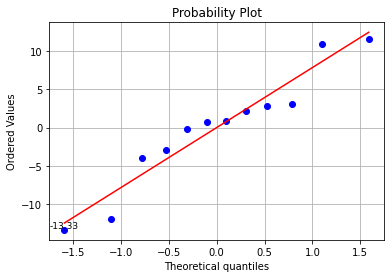

In [17]:
# 残差的正态概率图
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [18]:
# 异常值检验
MSE = SSE / (n - p - 1)
# MSE = model.mse_resid
d = np.abs(y) / np.sqrt(MSE)
if d < 3:
    print('残差', round(y, 2), '不是异常值.')
else:
    print('残差', round(y, 2), '可能是异常值')


残差 -13.33 不是异常值.


数据近似服从正态

2）残差密度图

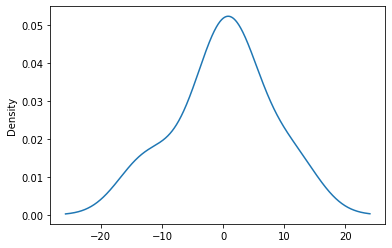

In [19]:
plt.figure()
#ols.fit().model is a method to access to the residual.
model.resid.plot.density()
plt.show()

从图中可以看出，残差近似正态分布的

#### 2. 检查方差齐性

绘制残差与拟合值的关系图

使用残差与拟合值图可验证“残差随机分布”和“具有常量方差”的假设。理想情况下，点应当在 0 的两端随机分布，点中无可辨识的模式。  
下表中的模式可能表示该模型不满足模型假设: 

| 模式 | 模式的含义 |
| :----------: | :--------: |
| 残差相对拟合值呈扇形或不均匀分散 | 异方差 |
| 曲线 | 缺少高阶项 |
| 远离 0 的点 | 异常值 |
| 在 X 方向远离其他点的点 | 有影响的点|

Text(0, 0.5, 'e_i')

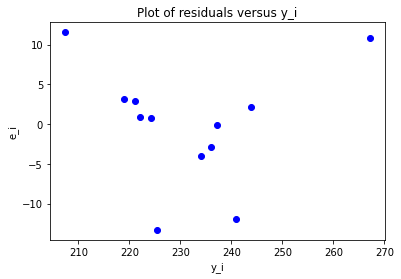

In [20]:
# 残差与拟合值的关系图
plt.scatter(y_hat, res, c = 'blue')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

由上面残差与拟合值的关系图可以看到分布杂乱无章并且没有规律，无法找到推翻原方差齐性假设的理由，所以数据满足方差齐性。

### Q4. 当发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时，估计制动马力值的合理区间范围.

绘制12台汽车发动机的制动马力值3维空间分布图。

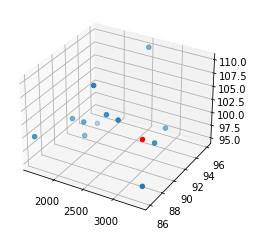

In [21]:
from mpl_toolkits.mplot3d import Axes3D

x = X[:,1]
y =  X[:,2]
f_x_y=X[:,3]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, f_x_y);
ax.scatter3D(3000, 90, 100, color='red', label="predict")#红色的点为要估计的

In [22]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta_hat)
    delta0 = tVal * sigma * np.sqrt(x0.T @ C @ x0)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

# 给定 x_0，求 y_0 的预测区间
def prediction_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta_hat)
    delta1 = tVal * sigma * np.sqrt(1 + x0.T @ C @ x0)
    Y0_int = [Y0 - delta1, Y0 + delta1]
    return Y0_int

假设该发动机跟12台汽车发动机来自同一个分布。该发动机转速为3000转/min，道路辛烷值为90，发动机压缩值为100时。下面给出一个合理的区间，来预测制动马力值的合理区间范围。

In [23]:
x0 = [1, 3000, 90, 100]
print('x = ', x0, 
      ', E(y_0) 的置信区间：', np.round(confidence_interval(x0), 4), 
      ', y_0 的预测区间：', np.round(prediction_interval(x0), 4)
     )

x =  [1, 3000, 90, 100] , E(y_0) 的置信区间： [226.2457 243.7181] , y_0 的预测区间： [212.8622 257.1016]


在理论上，由于预测区间不止包括E(y)的误差，还需要包括y的误差。因此预测区间的范围总是要比置信区间要大。从上面的结果也可以看到预测区间比置信区间宽。